In [162]:
%matplotlib inline

In [128]:
import matplotlib.pyplot as plt

In [160]:
import numpy as np

In [1]:
import pandas as pd

In [5]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [96]:
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

1.Вивести перші рядки таблиці за допомогою методу head

In [98]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


2.Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [100]:
df.shape

(28, 9)

3.Замініть у таблиці значення "—" на значення NaN

In [102]:
df.replace("—", np.nan, inplace=True)

4.Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [104]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

5.Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [106]:
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

6.Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [108]:
df.isnull().sum() / len(df) * 100

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

7.Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [110]:
df = df[:-1]

8.Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)


In [112]:
df = df.fillna(df.mean(numeric_only=True), axis=0)

9.Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [120]:
mean_birth_2019 = df['2019'].mean()
df[df['2019'] > mean_birth_2019]['Регіон']

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

10.У якому регіоні була найвища народжуваність у 2014 році?

In [154]:
max_birth_2014 = df.loc[df['2014'].idxmax(), 'Регіон']

In [156]:
max_birth_2014

'Рівненська'

11.Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

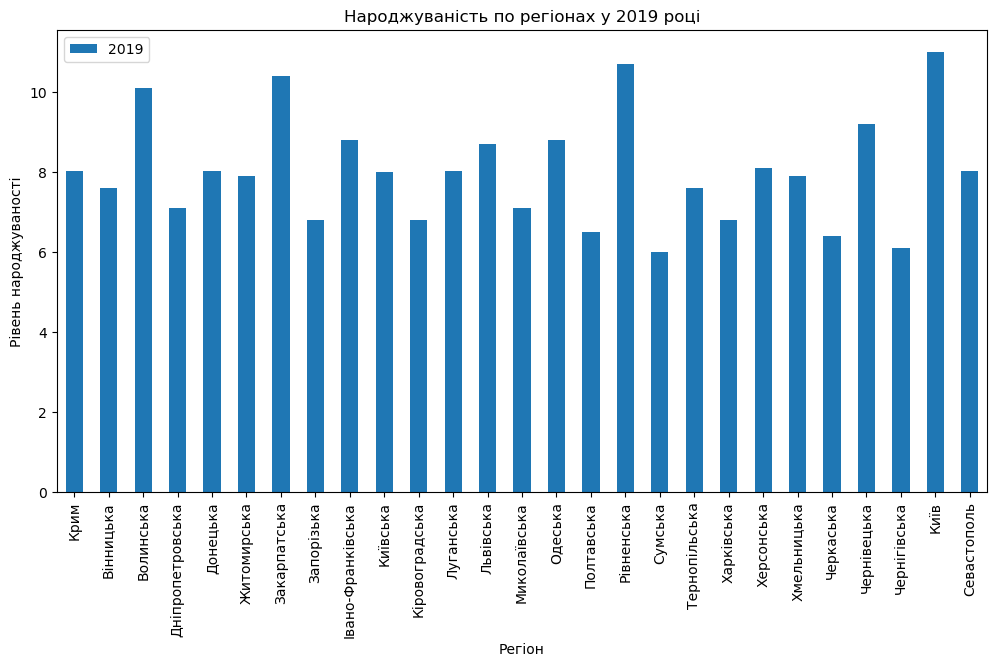

In [142]:
df.plot(kind='bar', x='Регіон', y='2019', figsize=(12,6))
plt.ylabel('Рівень народжуваності')
plt.title('Народжуваність по регіонах у 2019 році')
plt.show()

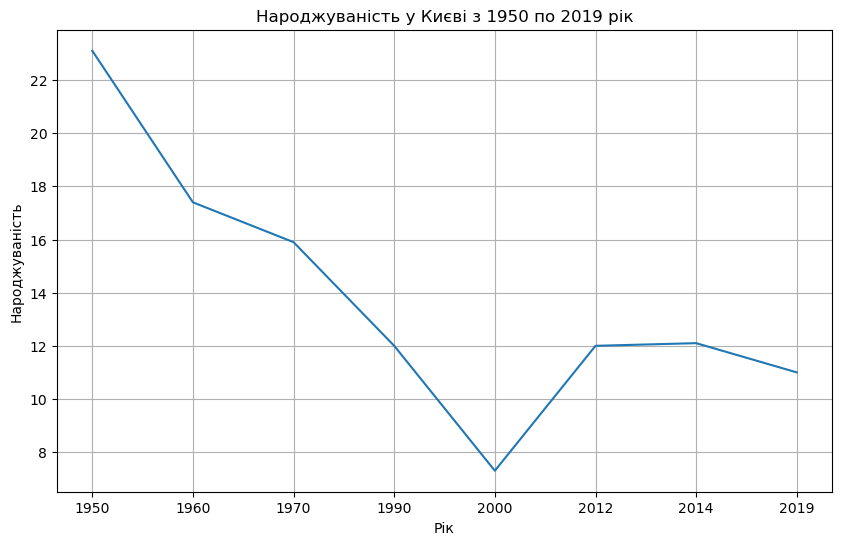

In [180]:
region_data = df[df['Регіон'] == 'Київ'].dropna(axis=1)
years = region_data.columns[1:]

plt.figure(figsize=(10, 6))
plt.plot(years, region_data.iloc[0, 1:])
plt.title('Народжуваність у Києві з 1950 по 2019 рік')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.grid(True)
plt.show()


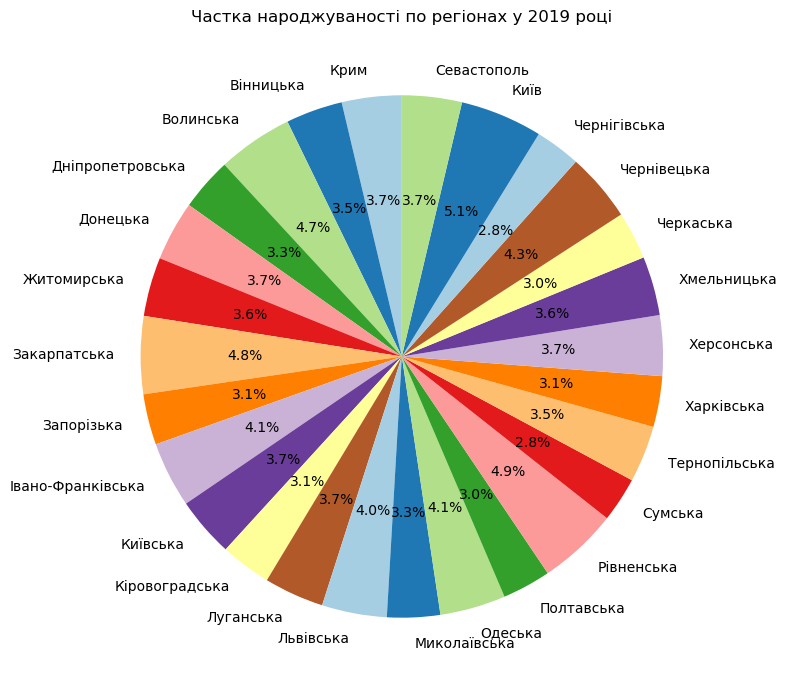

In [190]:
plt.figure(figsize=(8, 8))
plt.pie(df['2019'], labels=df['Регіон'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Частка народжуваності по регіонах у 2019 році')
plt.tight_layout()
plt.show()